# HW_1

### Опис

Citation:
Nash,Warwick, Sellers,Tracy, Talbot,Simon, Cawthorn,Andrew, and Ford,Wes. (1995).
Abalone. UCI Machine Learning Repository. https://doi.org/10.24432/C55C7W.

#### Назва:

Abalone

#### Оригінальні власники бази даних:

Морські дослідницькі лабораторії Відділу морських ресурсів –
Департамент первинної промисловості та рибальства Таруни, Тасманія
GPO Box 619F, Гобарт, Тасманія 7001, Австралія
(контакт: Warwick Nash +61 02 277277, wnash '@' dpi.tas.gov.au )

Донор бази даних:
Сем Во (Sam.Waugh '@' cs.utas.edu.au )
Департамент комп'ютерних наук, Університет Тасманії
GPO Box 252C, Гобарт, Тасманія 7001, Австралія

#### Інформація про набір даних:

Прогнозування статті морського вушка(абалона) за фізичними вимірюваннями.

#### Інформація про атрибути:

#### Примірники/Атрибути

4177/9

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
abalone = pd.read_csv('abalone.csv', sep =',')

In [4]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### EDA

In [5]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   int64  
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


Дана функція відображає всі стовпці та кількість рядків, щоб перевірити чи немає нульових значень.
Отже нульових значень немає та всі значення числові. 

Статистичний аналіз:

In [6]:
abalone.shape

(4176, 9)

Рядків всього 4176. Стовпців - 9.

In [7]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Нульових значень немає. 

In [8]:
abalone.duplicated().sum()

0

Дублікатів немає.

Так як немає нульових значень, немає дублікатів та всі дані числові немає потреби змінювати дані. Тому переходимо до матриці.

<Axes: >

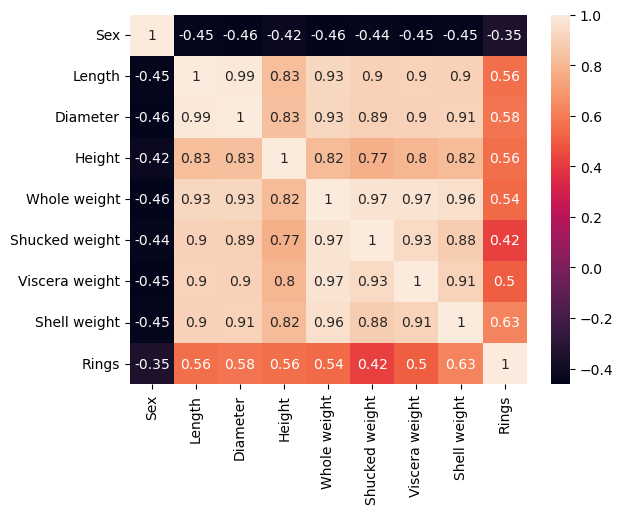

In [9]:
correlation_matrix = abalone.corr()
sns.heatmap(correlation_matrix,annot=True,)

Функція sns.heatmap() з бібліотеки Seaborn використовується для створення теплової карти матриці кореляції DataFrame з назвою abalone. Функція corr() обчислює кореляцію між усіма парами стовпців у DataFrame, а sns.heatmap() візуалізує кореляції за допомогою кольорів.
Параметр annot=True у функції sns.heatmap() дозволяє відображати значення кореляції на тепловій карті, тобто кожна комірка матиме відповідне числове значення.

In [10]:
abalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.955699,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.827782,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


 ### Preprocessing

In [11]:

# Фільтрація ознак з кореляцією більше 0.1
selected_features = correlation_matrix[(correlation_matrix > 0.1)]

# Виведення відфільтрованих ознак
print(selected_features)

                Sex    Length  Diameter    Height  Whole weight  \
Sex             1.0       NaN       NaN       NaN           NaN   
Length          NaN  1.000000  0.986813  0.827552      0.925255   
Diameter        NaN  0.986813  1.000000  0.833705      0.925452   
Height          NaN  0.827552  0.833705  1.000000      0.819209   
Whole weight    NaN  0.925255  0.925452  0.819209      1.000000   
Shucked weight  NaN  0.897905  0.893159  0.774957      0.969403   
Viscera weight  NaN  0.903010  0.899726  0.798293      0.966372   
Shell weight    NaN  0.897697  0.905328  0.817326      0.955351   
Rings           NaN  0.557123  0.575005  0.558109      0.540818   

                Shucked weight  Viscera weight  Shell weight     Rings  
Sex                        NaN             NaN           NaN       NaN  
Length                0.897905        0.903010      0.897697  0.557123  
Diameter              0.893159        0.899726      0.905328  0.575005  
Height                0.774957       

Обираємо ознаки, кореляція яких перевищує 0,1

In [13]:
features = abalone[['Length', 'Diameter', 'Height', 
       'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

Розділення набору функцій і цільового масиву

In [14]:
features = features.to_numpy()

Перетворений набір функцій у масив numpy

In [15]:
target = abalone['Sex'].to_numpy() 

Перетворений досліджуваний стовпець на масив numpy

In [16]:
scaler = StandardScaler()

Використовуємо для стандартизації даних, що означає перетворення даних таким чином, щоб кожна ознака мала середнє значення 0 і стандартне відхилення 1.

In [17]:
features = scaler.fit_transform(features)

 scaler.fit_transform(features) виконує стандартизацію ознак у масиві features і повертає новий масив зі стандартизованими значеннями. 

In [18]:
features

array([[-1.44900723, -1.43989229, -1.18425209, ..., -1.20532696,
        -1.21305408, -0.90979684],
       [ 0.0498915 ,  0.12201495, -0.10824748, ..., -0.35684354,
        -0.20727719, -0.28929846],
       [-0.69955786, -0.4322102 , -0.34735962, ..., -0.60773918,
        -0.60240383,  0.02095074],
       ...,
       [ 0.63279657,  0.67624011,  1.56553747, ...,  0.97518418,
         0.49676663, -0.28929846],
       [ 0.84097695,  0.77700832,  0.25042072, ...,  0.73341202,
         0.41055718,  0.02095074],
       [ 1.54879024,  1.48238578,  1.32642533, ...,  1.78717368,
         1.84019719,  0.64144912]])

<Axes: xlabel='Sex', ylabel='count'>

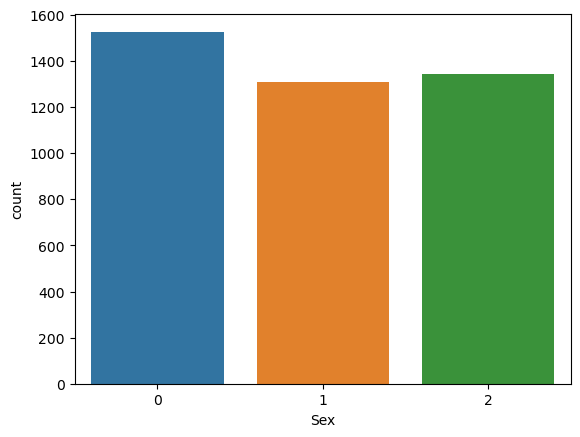

In [19]:
sns.countplot(data = abalone, x = 'Sex')

Отже на діаграмі видно скільки абалонів має стать чоловічу, жіночу та середню. чоловік-0 , жінка-1 та немовля-2

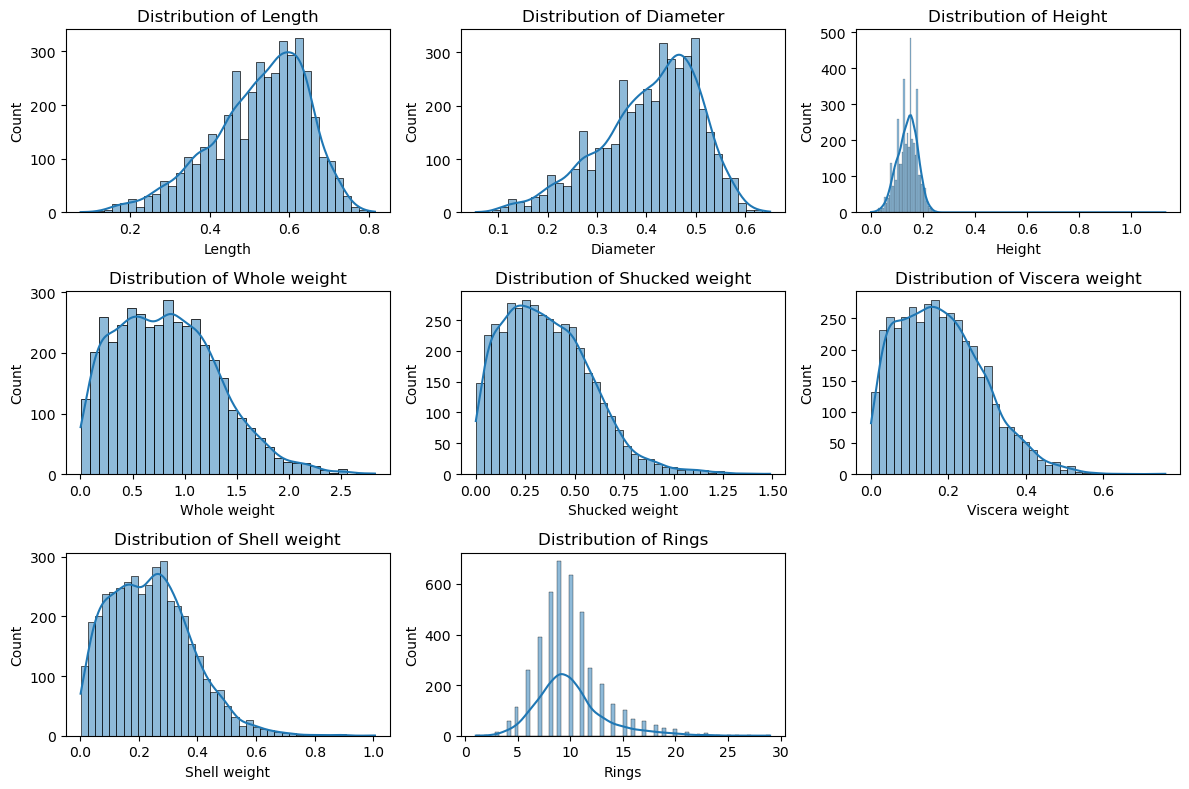

In [36]:
plt.figure(figsize=(12, 8))
features_ = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
for i, features_ in enumerate(features_):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=abalone, x=features_, kde=True)
    plt.title(f'Distribution of {features_}')
    plt.xlabel(features_)

plt.tight_layout()
plt.show()

Цей код створює графіки розподілу важливих ознак (Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight). Кожен графік показує розподіл значень окремої ознаки з використанням гістограми та оцінки щільності ядра (KDE).

### Model training

In [22]:
# running split function on our dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3340, 8), (3340,), (836, 8), (836,))

Для класифікації спершу використаємо метод опорних векторів.

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Створити модель SVM
svm_model = SVC()

# Тренувати модель на навчальних даних
svm_model.fit(X_train, y_train)

# Зробити прогнози на тестових даних
y_pred = svm_model.predict(X_test)

# Оцінити точність моделі
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5598086124401914


Отже точність при цьому методі сягає 56%

Наразі для порівняння використаємо метод ближніх сусідів

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5334928229665071

Точність замала, для збільшення точності збільшимо кількість сусідів для порівняння.

In [43]:
k_values = list(range(1,20))
accuracy_list = []

In [44]:
for k in k_values:
    m = KNN(n_neighbors=k)      # initialize model with K value
    m.fit(X_train, y_train)     # train model
    y_pred = m.predict(X_test)  # evaluate model
    accuracy_list.append(accuracy_score(y_test, y_pred))

In [57]:
model_k = KNN(n_neighbors = 59)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)
accuracy_score(y_test, y_pred)

0.5598086124401914

<Axes: >

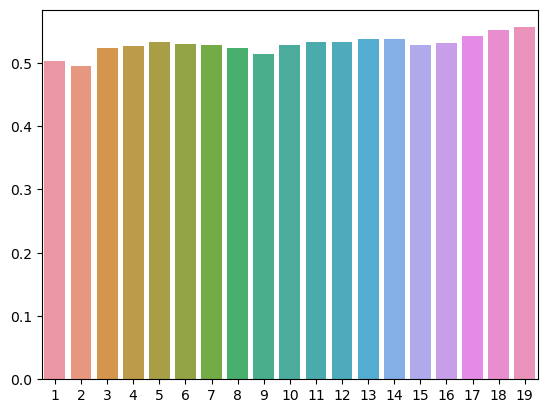

In [46]:
# plotting k-value vs accuracy plot
sns.barplot(data = { 'k_values': k_values, 'accuracy': accuracy_list }, x = 'k_values', y = 'accuracy')

Точність збільшено, вона сягає майже 57%, тож надалі будемо використовувати цей метод.

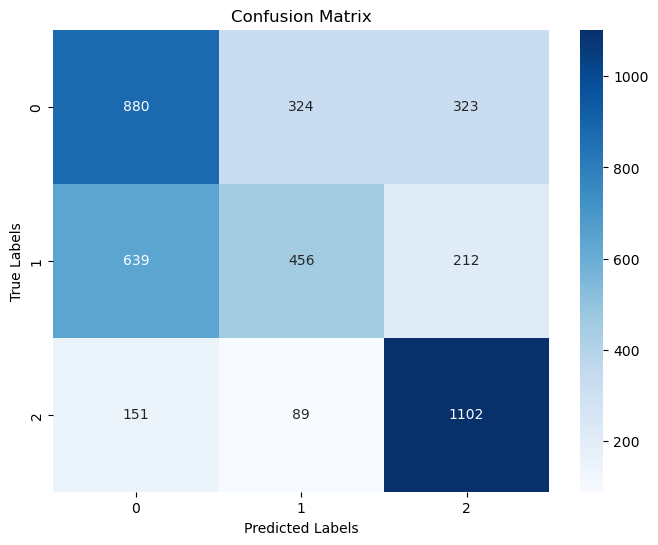

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Отримання прогнозованих міток за допомогою моделі
predicted_labels = model_k.predict(features)

# Розрахунок матриці помилок
cm = confusion_matrix(target, predicted_labels)

# Візуалізація матриці помилок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Візуалізовано матрицю помилок у вигляді теплової карти, де по вісі х відображаються прогнозовані мітки, а по вісі у - справжні мітки. Кожна клітина матриці показує кількість спостережень, що належать до певної комбінації справжньої мітки та прогнозованої мітки. Значення поза діагоналлю відповідають помилкам моделі.
Найбільше модель помилилась з визначенням статті для чоловіків, 639 екземплярів було визначенно як середня стать. Найблільше правильних варіантів(1102) було з жіночою статтю. 

### Hyperparameter tuning with Grid Search

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [61]:
params = {
    'penalty': ['l1','l2'], 
    'C': [0.001,0.01,0.1,1,10,100,1000], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

In [64]:
# disabling all the python warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [74]:
clf = GridSearchCV(
    LogisticRegression(), # model for grid search
    param_grid = params,  # hyperparameters value
    scoring='accuracy',   # metric for scoring
    cv=6,                 # number of fold in cross validation
)

In [75]:
clf.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [76]:
clf.best_score_

0.555985732060671

In [77]:
clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [78]:
logreg = LogisticRegression(C=1, solver='newton-cg')

In [79]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg')

In [80]:
logreg.score(X_test, y_test)

0.5765550239234449

In [81]:
y_pred = logreg.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred)

0.5765550239234449

 ### Висновки

Отже, в даній лабораторній було виконано дослідження EDA та робота з базовими моделями і функціями пакету scikit-learn.  
По-перше, було обрано набір даних з дослідження Абалонів, до набору входять Абалони різних статей(а точніше їх три). Далі було створено фрейм даних і перевірено його на наявність нульових значень, дублікатів та нечислових типів даних. Наступним кроком було визначено цільову змінну та вибір ознак, які мають максимальну кореляцію з цільовою змінною. Було виконано аналіз розподілу цільової змінної та взаємозв'язків між обраними ознаками. Наступним пунктом було тренування моделі. Було розділено дані на тренувальний та тестовий набір. Спочатку з бібліотеки scikit-learn було використано метод опорних векторів при якому отримано 56% точності. Для порівння наступним методом для тренування став KNN з бібліотеки scikit-learn. Після навчання та перевірки точності з різними значеннями k було обрано оптимальне значення k, використано матрицю помилок (confusion matrix) і створено графік, який візуалізує цю матрицю. Останнім кроком було налаштувати гіперпараметри для моделі логістичної регресії за допомогою алгоритму Greed Search (жадібний пошук). У результаті було отримано 57,6% точності. 